## Meta -

This file shows a MLP consructed for Logistic Regression and the decision boundry visualization

## Author - Rahul Suresh

In [1]:
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense , Dropout
from keras.callbacks import ModelCheckpoint
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [91]:
def get_data_5classes():
    x_train=[]
    y_train=[]
    for i in range(0,1000):
        x_train.append([random.randint(1,101),random.randint(1,101)])
        y_train.append([1,0,0,0,0])
    for i in range(0,1000):
        x_train.append([random.randint(111,211),random.randint(111,211)])
        y_train.append([0,1,0,0,0])
    for i in range(0,1000):
        x_train.append([random.randint(311,411),random.randint(311,411)])
        y_train.append([0,0,1,0,0])
    for i in range(0,1000):
        x_train.append([random.randint(511,611),random.randint(511,611)])
        y_train.append([0,0,0,1,0])
    for i in range(0,1000):
        x_train.append([random.randint(711,811),random.randint(711,811)])
        y_train.append([0,0,0,0,1])

    c = list(zip(x_train,y_train))
    random.shuffle(c)
    x_train, y_train = zip(*c)
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    return x_train,y_train
def get_data_2classes():
    x_train=[]
    y_train=[]
    for i in range(0,1000):
        x_train.append([random.randint(1,101),random.randint(1,101)])
        y_train.append([1,0])
#     for i in range(0,1000):
#         x_train.append([random.randint(111,211),random.randint(111,211)])
#         y_train.append([0,1,0,0,0])
    for i in range(0,1000):
        x_train.append([random.randint(311,411),random.randint(311,411)])
        y_train.append([0,1])
#     for i in range(0,1000):
#         x_train.append([random.randint(511,611),random.randint(511,611)])
#         y_train.append([0,0,0,1,0])
#     for i in range(0,1000):
#         x_train.append([random.randint(711,811),random.randint(711,811)])
#         y_train.append([0,0,0,0,1])

    c = list(zip(x_train,y_train))
    random.shuffle(c)
    random.shuffle(c)
    random.shuffle(c)
    random.shuffle(c)
    x_train, y_train = zip(*c)
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    return x_train,y_train
def build_model():
    model=Sequential()
    model.add(Dense(2, activation='relu', input_dim=2))
#     model.add(Dense(5,activation='softmax'))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
    print(model.summary())
    return model
def train_model(model,data_path,reload_filename='NULL',save_best_only=True,batch_size=32,num_epochs=10):
    if(save_best_only):
        checkpointer = ModelCheckpoint(filepath=data_path + 'model-{epoch:02d}-{acc:.4f}.hdf5', verbose=1,monitor='val_acc', save_best_only=True, mode='auto')
    else:
        checkpointer = ModelCheckpoint(filepath=data_path + 'model-{epoch:02d}-{acc:.4f}.hdf5', verbose=1)
    #period option in checkpointer -> after how many epochs to save the model
    if(reload_filename!="NULL"):
            model = load_model(reload_filename)
    history =model.fit(x_train, y_train,validation_split=0.3, epochs=num_epochs, batch_size=batch_size,callbacks=[checkpointer])
#     model.save(data_path + "final_model.hdf5")
    return history,model
def test_model_accuracy(x,y,filename):
    model = load_model(filename)
    scores = model.evaluate(x,y, verbose=1)
    print("Accuracy: %.2f%%" % (scores[1]*100))
def plot_learnings(x_train,filename,levels):
    model=load_model(filename)
    outs = model.predict(x_train)
    plt.plot(x_train[:,0],x_train[:,1],marker='o', markerfacecolor='green',linestyle="")
    #     plt.contourf(np.linspace(0, 1000, 5),np.linspace(0, 1000, 5000),outs, 4, cmap='RdGy')
    plt.contourf(np.linspace(0, 1000, 2),np.linspace(0, 1000, 2000),outs, levels, cmap='RdGy')
    plt.colorbar()
    plt.show()
    #I think these are the predicted classes because for
    #X AND Y is for the scale nothing more
def plot_learnings2(given_x,filename,interval):
    model=load_model(filename)
    grid=[]
    i=0
    while(i<1000):
        j=0
        while(j<1000):
            grid.append([i,j])
            j=j+interval
        i=i+interval
    grid=np.array(grid)
    outs = model.predict(grid)
#     plt.plot(x_train[:,0],x_train[:,1],marker='o', markerfacecolor='red',linestyle="")
    for i in range(0,outs.shape[0]):
        if(np.argmax(outs[i])==0):
            plt.scatter(grid[i,0],grid[i,1],color='green')
        else:
            plt.scatter(grid[i,0],grid[i,1],color='yellow')
    plt.scatter(given_x[:,0],given_x[:,1],color='blue')
    plt.show()
    return outs
def plot_ideal(x_train):
    plt.plot(x_train[:,0],x_train[:,1],marker='o', markerfacecolor='black',linestyle="")

    target_class1=np.array([[0,0,200],[0,200,0]])
    target_class2=np.array([[0,200,500,0],[200,0,0,500]])
    target_class3=np.array([[0,500,900,0],[500,0,0,900]])
    target_class4=np.array([[0,900,1300,0],[900,0,0,1300]])
    target_class5=np.array([[0,1300,1700,0],[1300,0,0,1700]])

    plt.fill(target_class1[0,:],target_class1[1,:],label="class1")


    plt.fill(target_class2[0,:],target_class2[1,:],label="class2")


    plt.fill(target_class3[0,:],target_class3[1,:],label="class3")
    plt.fill(target_class4[0,:],target_class4[1,:],label="class4")
    plt.fill(target_class5[0,:],target_class5[1,:],label="class5")

    plt.legend()
    plt.show()
def plot_ideal_lines(x_train):
    plt.plot(x_train[:,0],x_train[:,1],marker='o', markerfacecolor='green',linestyle="")

    target_class1=np.array([[0,200],[200,0]])
    target_class2=np.array([[0,500],[500,0]])
    target_class3=np.array([[0,900],[900,0]])
    target_class4=np.array([[0,1300],[1300,0]])
    target_class5=np.array([[0,1700],[1700,0]])

    plt.plot(target_class1[0,:],target_class1[1,:],label="class1")
    plt.plot(target_class2[0,:],target_class2[1,:],label="class2")
    plt.plot(target_class3[0,:],target_class3[1,:],label="class3")
    plt.plot(target_class4[0,:],target_class4[1,:],label="class4")
    plt.plot(target_class5[0,:],target_class5[1,:],label="class5")

    plt.legend()
    plt.show()
def plot_loss_acc(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [3]:
x_train,y_train=get_data_2classes()

In [4]:
model=build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
reload_filename="NULL"
history,model=train_model(model=model,data_path="/home/rahulsuresh/",reload_filename=reload_filename,num_epochs=100)

Train on 1400 samples, validate on 600 samples
Epoch 1/100
1400/1400 [==============================] - 0s 116us/step - loss: 0.1271 - acc: 0.8629 - val_loss: 0.1190 - val_acc: 0.8667

Epoch 00001: val_acc improved from -inf to 0.86667, saving model to /home/rahulsuresh/Downloads/model-01-0.8629.hdf5
Epoch 2/100
1400/1400 [==============================] - 0s 59us/step - loss: 0.1175 - acc: 0.8757 - val_loss: 0.1082 - val_acc: 0.8817

Epoch 00002: val_acc improved from 0.86667 to 0.88167, saving model to /home/rahulsuresh/Downloads/model-02-0.8757.hdf5
Epoch 3/100
1400/1400 [==============================] - 0s 62us/step - loss: 0.1068 - acc: 0.8857 - val_loss: 0.0988 - val_acc: 0.8900

Epoch 00003: val_acc improved from 0.88167 to 0.89000, saving model to /home/rahulsuresh/Downloads/model-03-0.8857.hdf5
Epoch 4/100
1400/1400 [==============================] - 0s 62us/step - loss: 0.0963 - acc: 0.8943 - val_loss: 0.0846 - val_acc: 0.8983

Epoch 00004: val_acc improved from 0.89000 to 0

1400/1400 [==============================] - 0s 58us/step - loss: 3.0826e-05 - acc: 1.0000 - val_loss: 2.2357e-05 - val_acc: 1.0000

Epoch 00039: val_acc did not improve from 1.00000
Epoch 40/100
1400/1400 [==============================] - 0s 53us/step - loss: 2.9305e-05 - acc: 1.0000 - val_loss: 2.1267e-05 - val_acc: 1.0000

Epoch 00040: val_acc did not improve from 1.00000
Epoch 41/100
1400/1400 [==============================] - 0s 43us/step - loss: 2.8055e-05 - acc: 1.0000 - val_loss: 1.9961e-05 - val_acc: 1.0000

Epoch 00041: val_acc did not improve from 1.00000
Epoch 42/100
1400/1400 [==============================] - 0s 43us/step - loss: 2.6809e-05 - acc: 1.0000 - val_loss: 1.9774e-05 - val_acc: 1.0000

Epoch 00042: val_acc did not improve from 1.00000
Epoch 43/100
1400/1400 [==============================] - 0s 41us/step - loss: 2.5398e-05 - acc: 1.0000 - val_loss: 1.8155e-05 - val_acc: 1.0000

Epoch 00043: val_acc did not improve from 1.00000
Epoch 44/100
1400/1400 [=========

1400/1400 [==============================] - 0s 47us/step - loss: 6.6587e-06 - acc: 1.0000 - val_loss: 4.9748e-06 - val_acc: 1.0000

Epoch 00081: val_acc did not improve from 1.00000
Epoch 82/100
1400/1400 [==============================] - 0s 42us/step - loss: 6.4848e-06 - acc: 1.0000 - val_loss: 4.8329e-06 - val_acc: 1.0000

Epoch 00082: val_acc did not improve from 1.00000
Epoch 83/100
1400/1400 [==============================] - 0s 41us/step - loss: 6.2910e-06 - acc: 1.0000 - val_loss: 4.6913e-06 - val_acc: 1.0000

Epoch 00083: val_acc did not improve from 1.00000
Epoch 84/100
1400/1400 [==============================] - 0s 65us/step - loss: 6.1277e-06 - acc: 1.0000 - val_loss: 4.6364e-06 - val_acc: 1.0000

Epoch 00084: val_acc did not improve from 1.00000
Epoch 85/100
1400/1400 [==============================] - 0s 56us/step - loss: 5.9408e-06 - acc: 1.0000 - val_loss: 4.4443e-06 - val_acc: 1.0000

Epoch 00085: val_acc did not improve from 1.00000
Epoch 86/100
1400/1400 [=========

Plot loss and accuracy curves

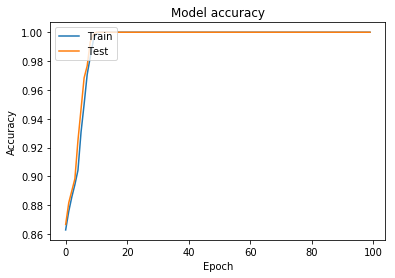

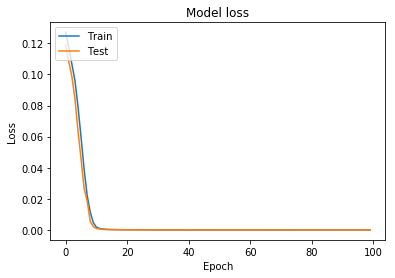

In [92]:
plot_loss_acc(history)

In [89]:
model=load_model('/home/rahulsuresh/model-11-0.9993.hdf5')
print(x_train[250])
print(model.predict_proba(np.reshape(x_train[250],[1,2])))
print(model.predict(np.reshape(x_train[250],[1,2])))

[89  4]
[[9.9988604e-01 1.1395937e-04]]
[[9.9988604e-01 1.1395937e-04]]


Model accuracy

In [8]:
filename="/home/rahulsuresh/Downloads/2_class/model-11-0.9993.hdf5"
test_model_accuracy(x_train,y_train,filename)

2000/2000 [==============================] - 0s 38us/step
Accuracy: 100.00%


Input Data Cloud

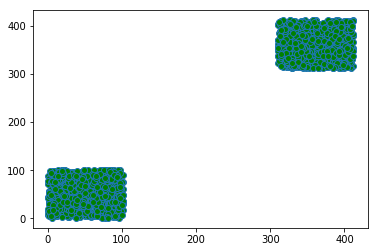

In [9]:
plt.plot(x_train[:,0],x_train[:,1],marker='o', markerfacecolor='green',linestyle="")
plt.show()

Ideal Boundries

In [93]:
# plot_ideal(x_train)

Plot Learnt Boundries

/home/rahulsuresh/Downloads/model-11-0.9993.hdf5



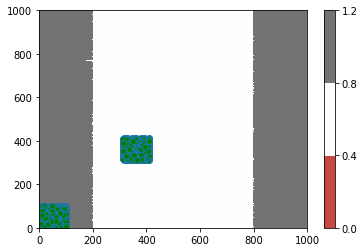

In [64]:
#note the function is slow to run
#expect a couple of minutes
#I dont think this is accurate
outs=plot_learnings(x_train,filename,levels=2)

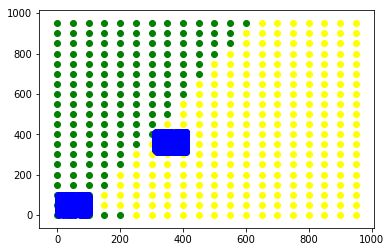

In [88]:
#note the function is slow to run
#expect a couple of minutes
outs=plot_learnings2(x_train,filename,interval=50)